In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import requests
import numpy as np
!pip install pillow
from PIL import Image
from IPython.display import Image as IPImage
from IPython.display import display

In [ ]:
df = pd.read_csv('/content/drive/My Drive/sddcomp.csv')

In [ ]:
df.head()

,track,artist,duration,time_signature,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,popularity,year,loudness_zscore
0,Babe,Styx,218,4,0.700,0.582,11,-5.960,0,0.0356,0.05020,0.000000,0.0881,0.785,116.712,96,1980,0.763707
1,The Rose,Bette Midler,244,4,0.264,0.640,8,-6.221,1,0.0442,0.03930,0.000002,0.1510,0.190,84.828,92,1980,0.695555
2,Cars,Gary Numan,248,4,0.338,0.562,9,-7.181,1,0.0290,0.03900,0.000000,0.1070,0.259,149.907,82,1980,0.444878
3,Magic,Olivia Newton-John,137,4,0.911,0.689,1,-6.176,1,0.2650,0.00119,0.000000,0.0704,0.546,140.034,80,1980,0.707305
4,We Don’t Talk Anymore,Cliff Richard,217,4,0.728,0.563,1,-8.053,0,0.1340,0.62100,0.000000,0.1790,0.352,100.017,80,1980,0.217181


In [ ]:
#cleaning the dataset

df.columns = df.columns.str.replace(' ', '_').str.lower()
# 2. Convert 'duration' to total seconds
def convert_duration_to_seconds(duration):
    minutes, seconds = map(int, duration.split(":"))
    return minutes * 60 + seconds

df['duration'] = df['duration'].apply(convert_duration_to_seconds)

# 3. Remove duplicates
df.drop_duplicates(inplace=True)

# 4. Handle missing values (if any)
# You can either drop rows with missing values or fill them
df.fillna(0, inplace=True)  # Example: Filling missing values with 0

# 5. Convert relevant columns to appropriate data types
# Ensure numerical columns are floats or ints as needed
numeric_columns = [
    'time_signature', 'danceability', 'energy', 'key', 'loudness', 'mode',
    'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence',
    'tempo', 'popularity', 'year'
]
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

# 6. Optionally detect and handle outliers (example: z-score method)
from scipy.stats import zscore
df['loudness_zscore'] = zscore(df['loudness'])
df = df[df['loudness_zscore'].abs() < 3]  # Remove rows where z-score is too high/low

# 7. Summary of cleaned data
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
Index: 986 entries, 0 to 997
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             986 non-null    object 
 1   artist            986 non-null    object 
 2   duration          986 non-null    int64  
 3   time_signature    986 non-null    int64  
 4   danceability      986 non-null    float64
 5   energy            986 non-null    float64
 6   key               986 non-null    int64  
 7   loudness          986 non-null    float64
 8   mode              986 non-null    int64  
 9   speechiness       986 non-null    float64
 10  acousticness      986 non-null    float64
 11  instrumentalness  986 non-null    float64
 12  liveness          986 non-null    float64
 13  valence           986 non-null    float64
 14  tempo             986 non-null    float64
 15  popularity        986 non-null    int64  
 16  year              986 non-null    int64  
 17  lo

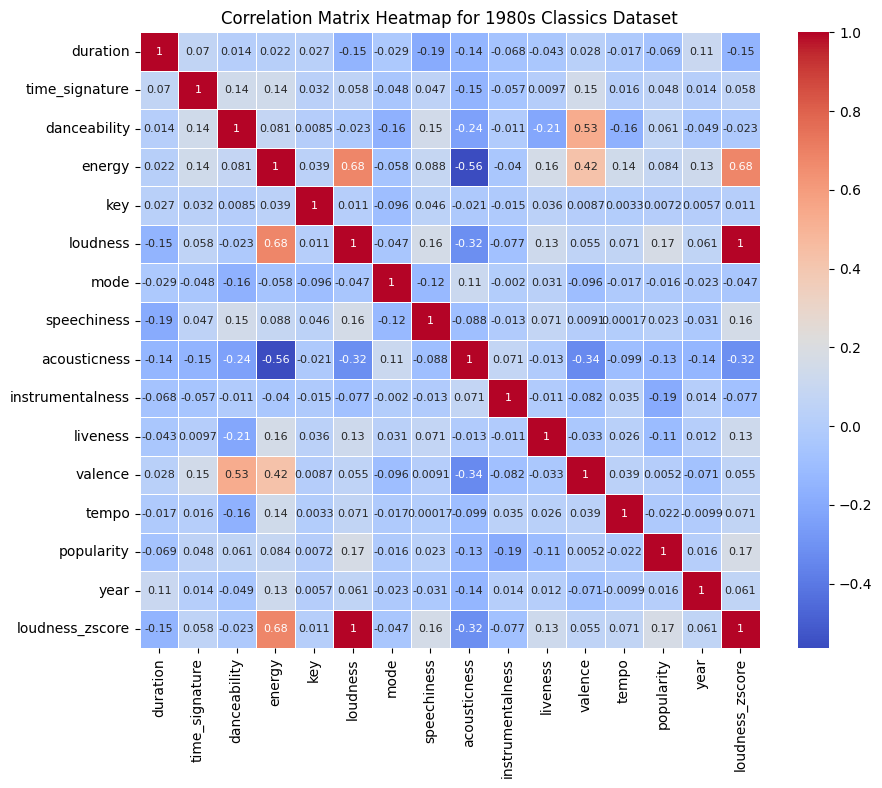

In [ ]:
# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
correlation_matrix = numerical_columns.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={"size":8})
plt.title('Correlation Matrix Heatmap for 1980s Classics Dataset')
plt.show()

In [ ]:
# Extract correlations of features with 'popularity'
correlations_with_popularity = correlation_matrix['popularity'].drop('popularity')

# Sort by correlation values
sorted_correlations = correlations_with_popularity.sort_values()

# Top 5 positively and negatively correlated features
top_5_positive = sorted_correlations.tail(5)
top_5_negative = sorted_correlations.head(5)

# Display the top 5 positive and negative correlations
print("Top 5 Positively Correlated Features with Popularity:\n", top_5_positive)
print("\nTop 5 Negatively Correlated Features with Popularity:\n", top_5_negative)

Top 5 Positively Correlated Features with Popularity:
 time_signature     0.048070
danceability       0.061098
energy             0.084321
loudness           0.171454
loudness_zscore    0.171454
Name: popularity, dtype: float64

Top 5 Negatively Correlated Features with Popularity:
 instrumentalness   -0.194455
acousticness       -0.131012
liveness           -0.108136
duration           -0.069142
tempo              -0.022422
Name: popularity, dtype: float64


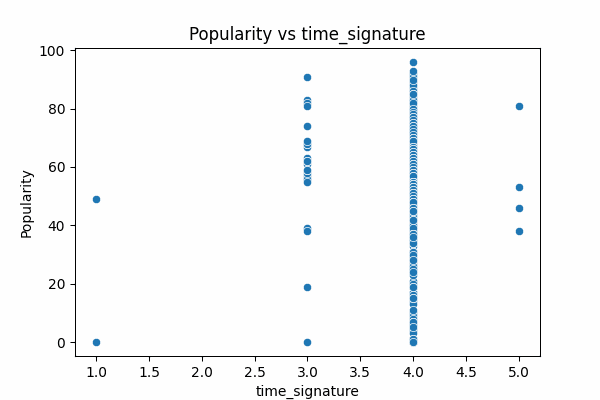

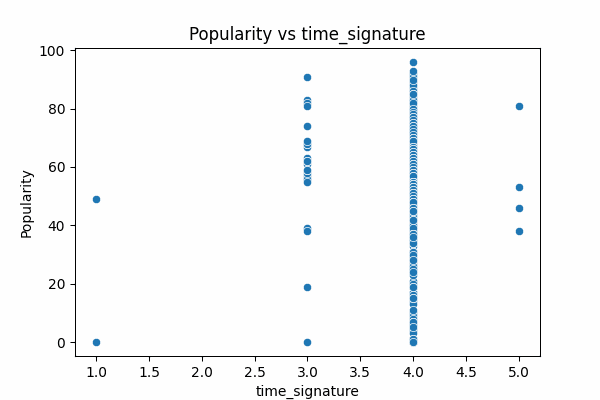

In [ ]:

# Extract correlations of features with 'popularity'
correlations_with_popularity = correlation_matrix['popularity'].drop('popularity')

# Sort by correlation values
sorted_correlations = correlations_with_popularity.sort_values()

# Top 5 positively and negatively correlated features
top_5_positive = sorted_correlations.tail(5)
top_5_negative = sorted_correlations.head(5)

# List of top 5 positively and negatively correlated features
top_5_features = list(top_5_positive.index) + list(top_5_negative.index)


# Initialize an empty list to hold the generated images
images = []

# Create a plot for each of the top 5 features and save them as images
for feature in top_5_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['popularity'])
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

    # Save each plot as an image
    plt.savefig(f'{feature}_vs_popularity.png')
    plt.close()  # Close the figure after saving to avoid memory leaks

    # Open the image and append it to the list
    images.append(Image.open(f'{feature}_vs_popularity.png'))

# Save the list of images as a GIF
images[0].save('popularity_correlation_animation.gif',
               save_all=True, append_images=images[1:], duration=1000, loop=0)


# Display the generated GIF
display(IPImage(filename='popularity_correlation_animation.gif'))


# Step 1: Extract top 5 positively and negatively correlated features with 'popularity'
correlations_with_popularity = correlation_matrix['popularity'].drop('popularity')
sorted_correlations = correlations_with_popularity.sort_values()
top_5_positive = sorted_correlations.tail(5)
top_5_negative = sorted_correlations.head(5)
top_5_features = list(top_5_positive.index) + list(top_5_negative.index)

# Step 2: Initialize an empty list to hold the generated images
images = []

# Step 3: Create and save scatter plots for each feature
for feature in top_5_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df['popularity'])
    plt.title(f'Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

    # Save each plot as an image
    plt.savefig(f'{feature}_vs_popularity.png')
    plt.close()  # Close the figure after saving

    # Open the image and append it to the list
    images.append(Image.open(f'{feature}_vs_popularity.png'))

# Step 4: Create an animated GIF from the images
images[0].save('popularity_correlation_animation.gif',
               save_all=True, append_images=images[1:], duration=1000, loop=0)

# Step 5: Display the GIF in Google Colab
display(IPImage(filename='popularity_correlation_animation.gif'))


In [ ]:
#Download the GIF from Google Colab
from google.colab import files
files.download('popularity_correlation_animation.gif')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


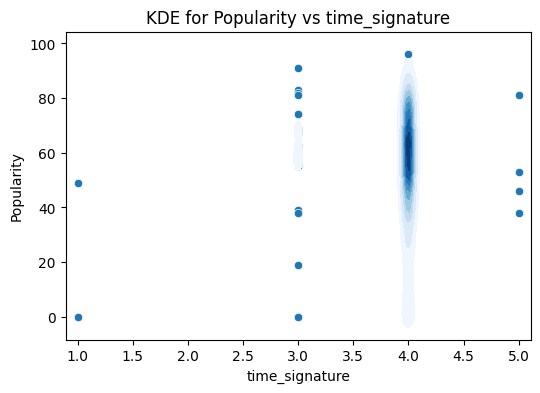

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


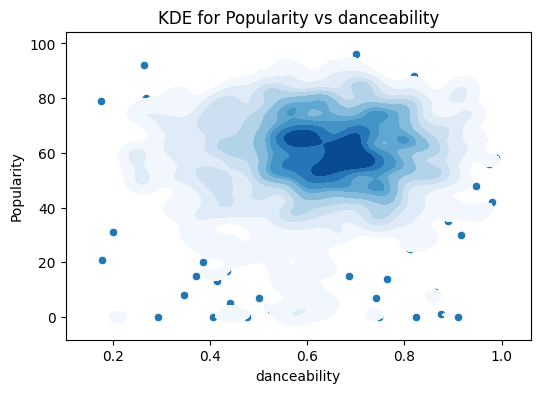

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


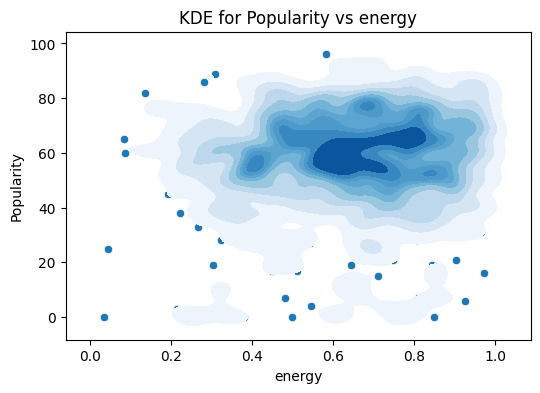

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


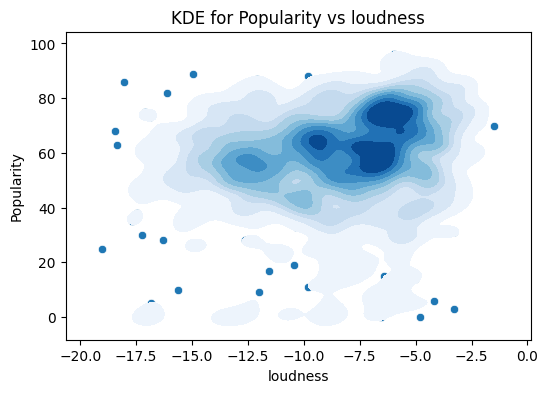

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


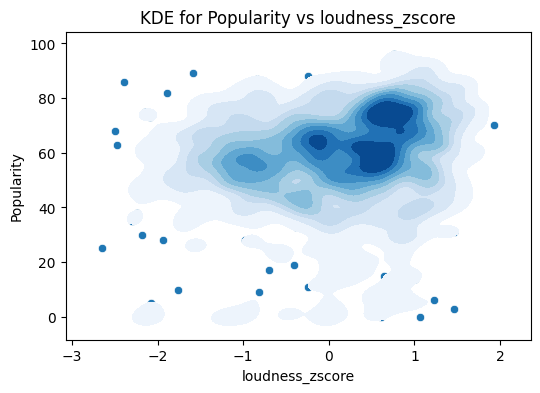

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


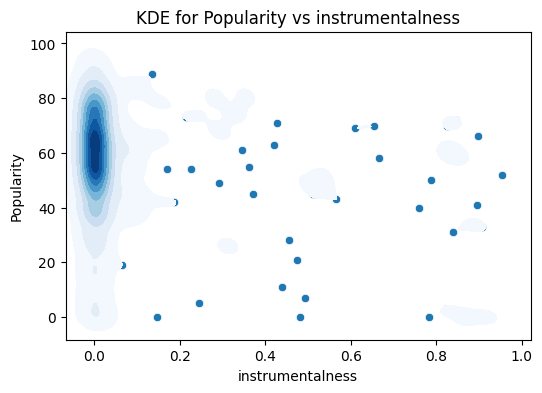

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


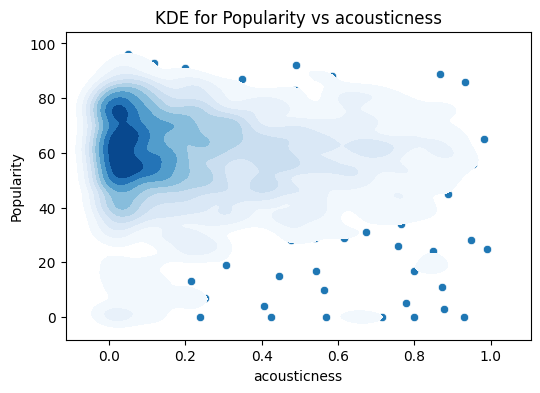

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


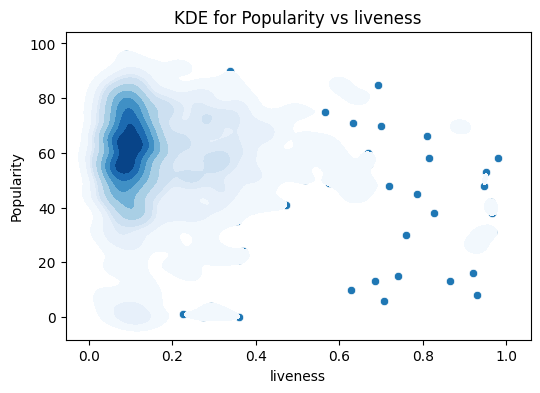

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


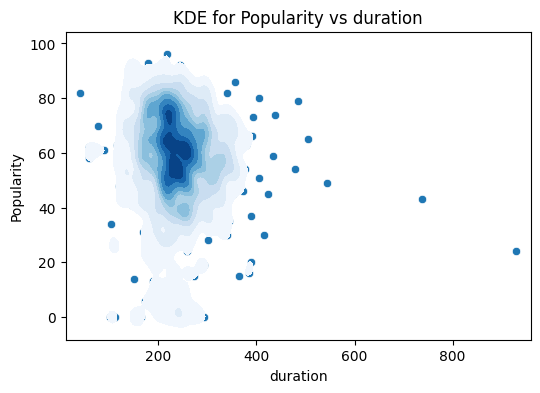

<ipython-input-33-892f03e53459>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)


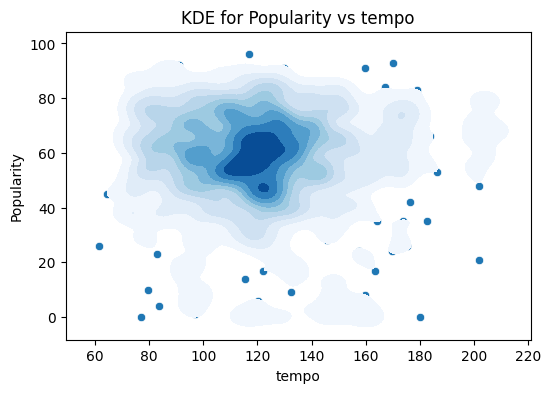

In [ ]:
# Loop through the top 5 positively and negatively correlated features
for feature in top_5_features:
    plt.figure(figsize=(6, 4))

    # Create scatter plot with KDE overlay
    sns.scatterplot(x=df[feature], y=df['popularity'])
    sns.kdeplot(x=df[feature], y=df['popularity'], cmap="Blues", shade=True, bw_adjust=0.5)

    # Labels and title
    plt.title(f'KDE for Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

    # Show plot
    plt.show()

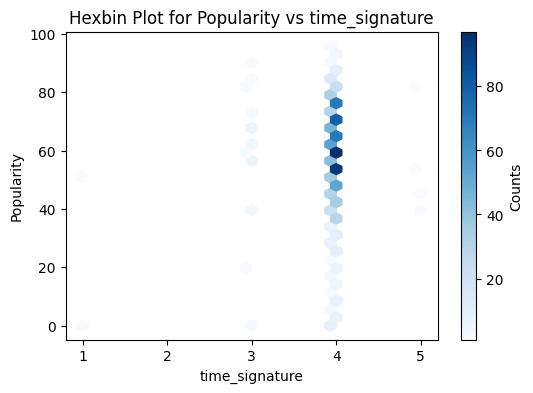

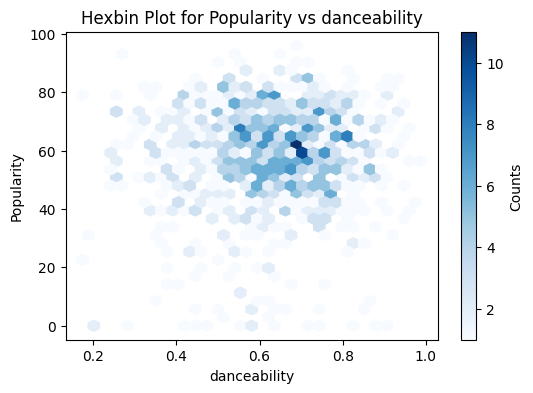

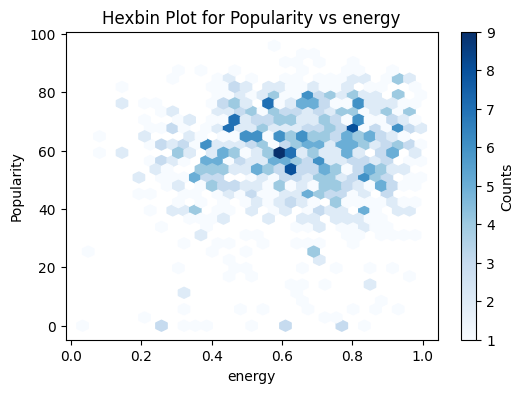

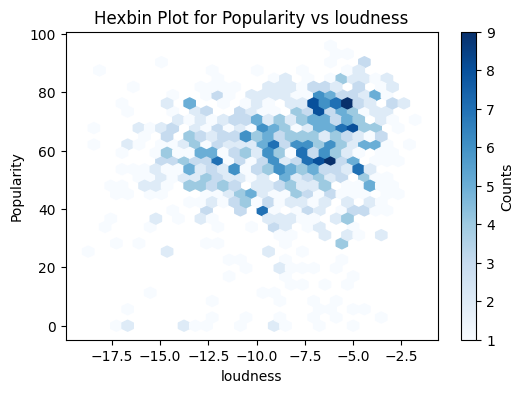

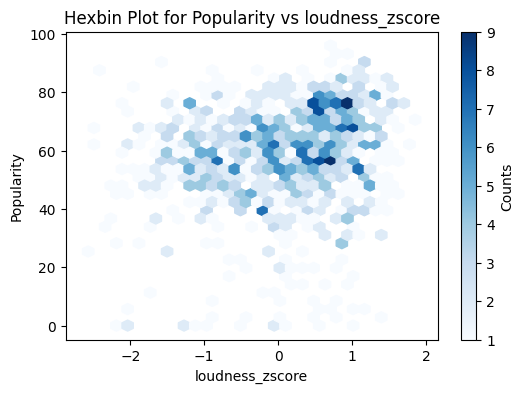

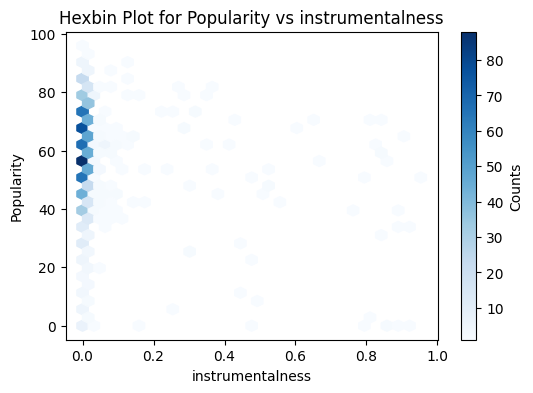

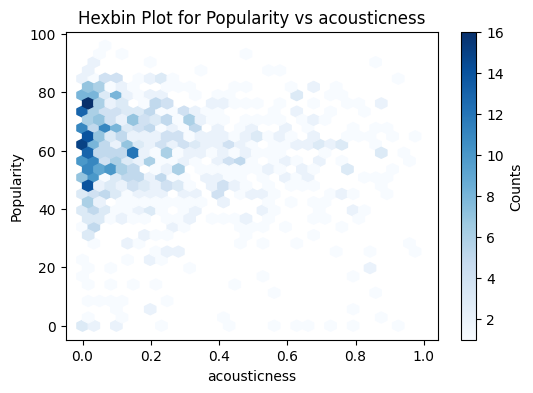

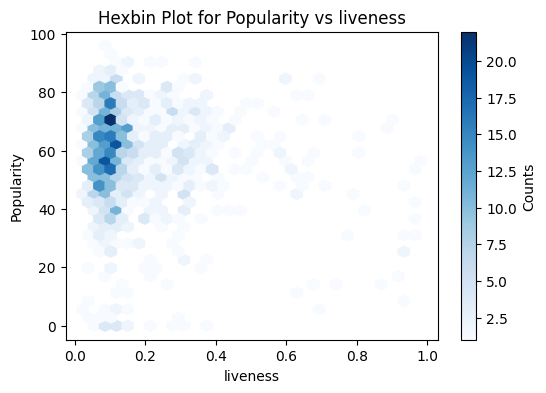

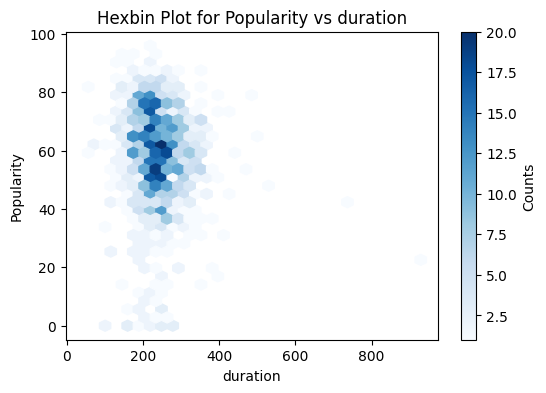

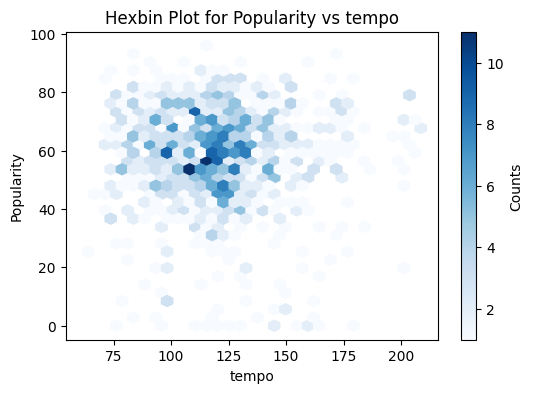

In [ ]:
for feature in top_5_features:
    plt.figure(figsize=(6, 4))

    # Create hexbin plot
    plt.hexbin(df[feature], df['popularity'], gridsize=30, cmap='Blues', mincnt=1)

    # Add colorbar to show the density level
    plt.colorbar(label='Counts')

    # Labels and title
    plt.title(f'Hexbin Plot for Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

    # Show plot
    plt.show()

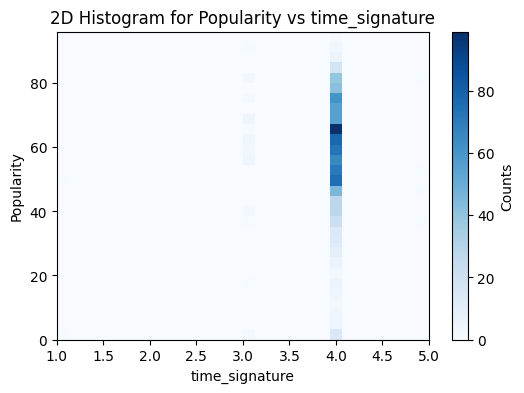

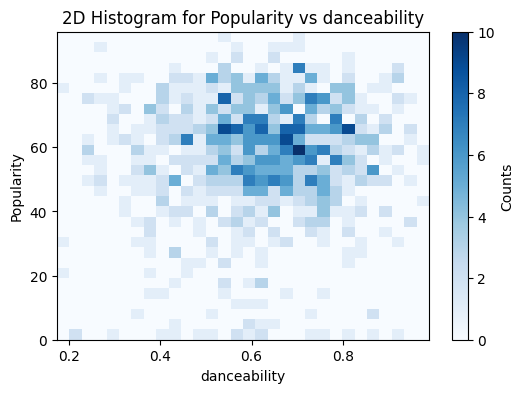

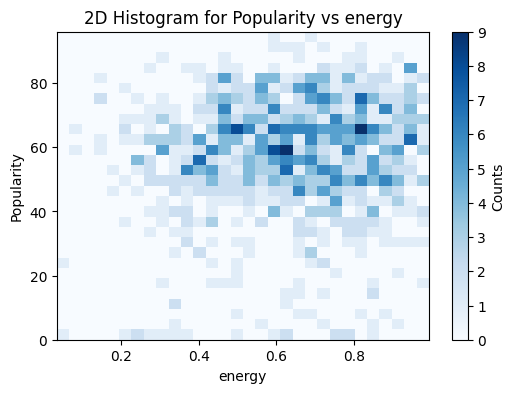

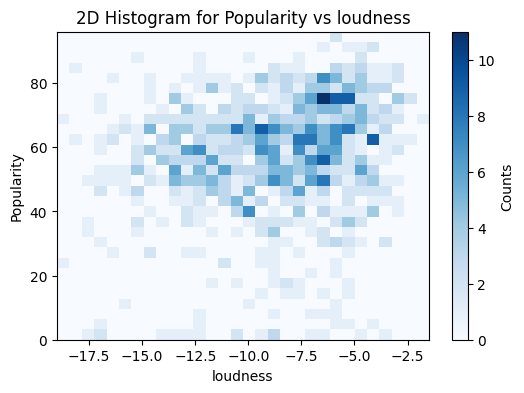

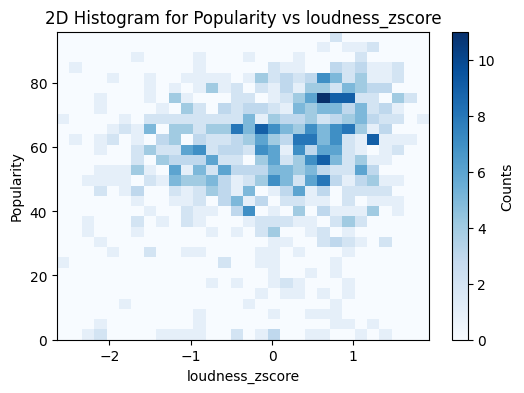

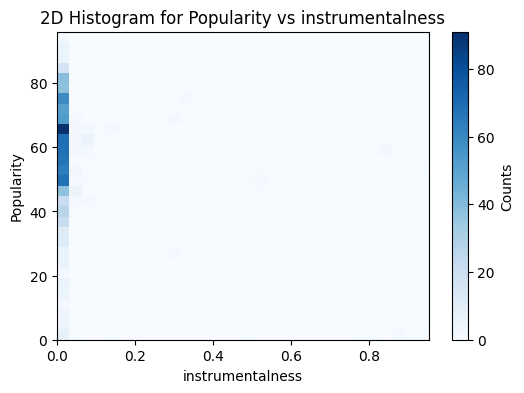

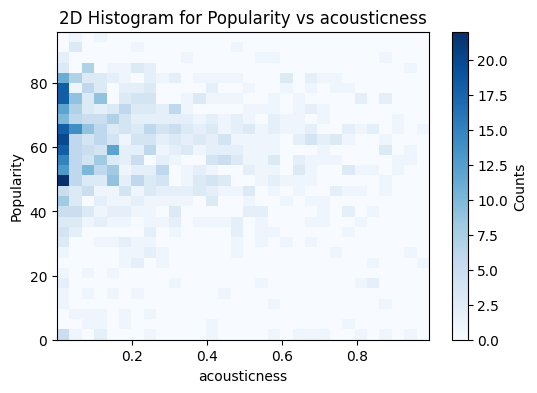

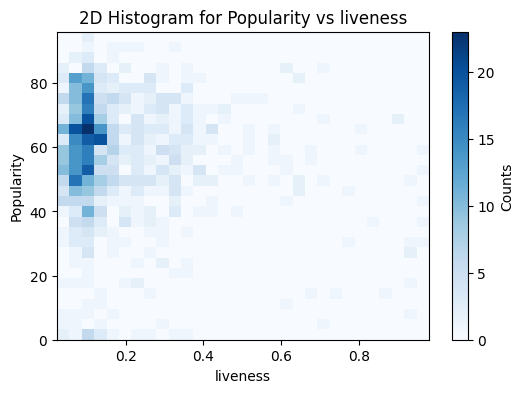

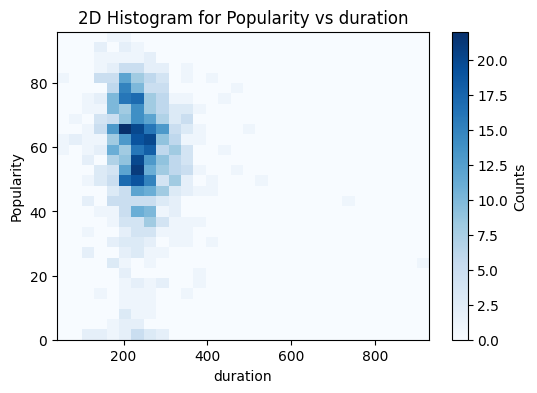

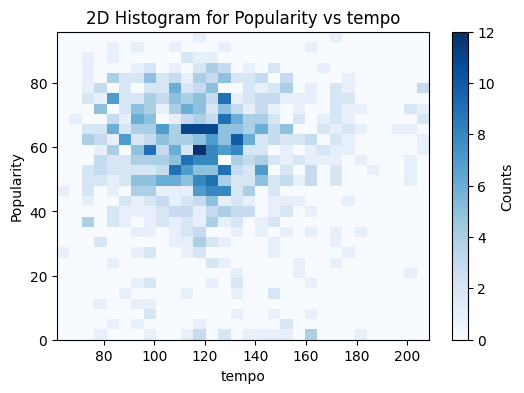

In [ ]:
for feature in top_5_features:
    plt.figure(figsize=(6, 4))

    # Create 2D histogram
    plt.hist2d(df[feature], df['popularity'], bins=30, cmap='Blues')

    # Add colorbar to show the density level
    plt.colorbar(label='Counts')

    # Labels and title
    plt.title(f'2D Histogram for Popularity vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Popularity')

    # Show plot
    plt.show()